### Importamos variables

In [1]:
### Manipulación de Datos
import pandas as pd
import numpy as np

### Visualización de Datos
import seaborn as sns
import matplotlib.pyplot as plt

### Tratamiento de datos
from utils.funciones import CategoricalAnalysis, extended_describe

### Importamos datos    

In [2]:
df = pd.read_csv(r"data\raw\Service_Options.csv")
df.head()

,customer_id,tenure,internet_service,phone_service,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals
0,0002-ORFBO,9,Yes,Yes,No,16,Yes,NaN,Yes,2
1,0003-MKNFE,9,Yes,Yes,Yes,10,No,NaN,No,0
2,0004-TLHLJ,4,Yes,Yes,No,30,Yes,Offer E,No,0
3,0011-IGKFF,13,Yes,Yes,No,4,Yes,Offer D,Yes,1
4,0013-EXCHZ,3,Yes,Yes,No,11,Yes,NaN,Yes,3


|Column Name |	Description| 
|--------------|----------|
|CustomerID|	A unique ID that identifies each customer.|
|Tenure in Months|	Indicates total months that the customer has been with the company by quarter end|
|Referred a Friend|	Indicates if the customer has ever referred a friend or family member to this company: Yes, No|
|Number of Referrals|	Indicates number of referrals made by this customer|
|Avg Monthly GB Download|	Indicates average download volume in gigabytes calculated by quarter end|
|Offer|	Identifies last marketing offer accepted by this customer (None, Offer A-E)|
|Phone Service|	Indicates if home phone service is subscribed: Yes, No|
|Multiple Lines|	Indicates if multiple telephone lines are subscribed: Yes, No|

In [3]:
print(f'La base de datos a analizar posee {df.shape[0]} filas y {df.shape[1]} columnas')
print(f'\nLas features que tenemos son: {list(df.columns)}')

La base de datos a analizar posee 7043 filas y 10 columnas

Las features que tenemos son: ['customer_id', 'tenure', 'internet_service', 'phone_service', 'multiple_lines', 'avg_monthly_gb_download', 'unlimited_data', 'offer', 'referred_a_friend', 'number_of_referrals']


### Primera exploración

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   customer_id              7043 non-null   object
 1   tenure                   7043 non-null   int64 
 2   internet_service         7043 non-null   object
 3   phone_service            7043 non-null   object
 4   multiple_lines           7043 non-null   object
 5   avg_monthly_gb_download  7043 non-null   int64 
 6   unlimited_data           7043 non-null   object
 7   offer                    3166 non-null   object
 8   referred_a_friend        7043 non-null   object
 9   number_of_referrals      7043 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 550.4+ KB


In [6]:
df.describe()

,tenure,avg_monthly_gb_download,number_of_referrals
count,7043.000000,7043.000000,7043.000000
mean,32.371149,20.515405,1.951867
std,24.559481,20.418940,3.001199
min,0.000000,0.000000,0.000000
25%,9.000000,3.000000,0.000000
50%,29.000000,17.000000,0.000000
75%,55.000000,27.000000,3.000000
max,72.000000,85.000000,11.000000


In [5]:
df.describe(include="object")

,customer_id,internet_service,phone_service,multiple_lines,unlimited_data,offer,referred_a_friend
count,7043,7043,7043,7043,7043,3166,7043
unique,7043,2,2,2,2,5,2
top,9995-HOTOH,Yes,Yes,No,Yes,Offer B,No
freq,1,5517,6361,4072,4745,824,3821


In [7]:
df.isna().sum()

customer_id                   0
tenure                        0
internet_service              0
phone_service                 0
multiple_lines                0
avg_monthly_gb_download       0
unlimited_data                0
offer                      3877
referred_a_friend             0
number_of_referrals           0
dtype: int64

In [8]:
df[df.duplicated()]

,customer_id,tenure,internet_service,phone_service,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals


- La mayoria de nuestros usuarios posee servicio de internet y de teléfono.
- Al tener un customer_id unico para cada, no poseemos duplicados
- Una rápida observación en los valores nulos que poseemos dentro de la columna 'offer' si el usuario no aceptó nuestra medida de marketing el mismo no tendrá valor. No los vamos a eliminar, lo que haremos es colocar otra opción : 'sin oferta' para no perder información.

In [9]:
df['offer'].unique()

array([nan, 'Offer E', 'Offer D', 'Offer A', 'Offer B', 'Offer C'],
      dtype=object)

In [10]:
df.fillna({'offer' : 'Sin oferta'}, inplace=True)

In [11]:
df.isna().sum()

customer_id                0
tenure                     0
internet_service           0
phone_service              0
multiple_lines             0
avg_monthly_gb_download    0
unlimited_data             0
offer                      0
referred_a_friend          0
number_of_referrals        0
dtype: int64

In [12]:
df['offer'].unique()

array(['Sin oferta', 'Offer E', 'Offer D', 'Offer A', 'Offer B',
       'Offer C'], dtype=object)

In [15]:
df.to_csv(path_or_buf=r'data\clean\online_options_clean.csv',index=False)

### Análisis exploratorio

#### Análisis univariante

In [16]:
df = pd.read_csv(r"data\clean\online_options_clean.csv")
df.head()

,customer_id,tenure,internet_service,phone_service,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals
0,0002-ORFBO,9,Yes,Yes,No,16,Yes,Sin oferta,Yes,2
1,0003-MKNFE,9,Yes,Yes,Yes,10,No,Sin oferta,No,0
2,0004-TLHLJ,4,Yes,Yes,No,30,Yes,Offer E,No,0
3,0011-IGKFF,13,Yes,Yes,No,4,Yes,Offer D,Yes,1
4,0013-EXCHZ,3,Yes,Yes,No,11,Yes,Sin oferta,Yes,3


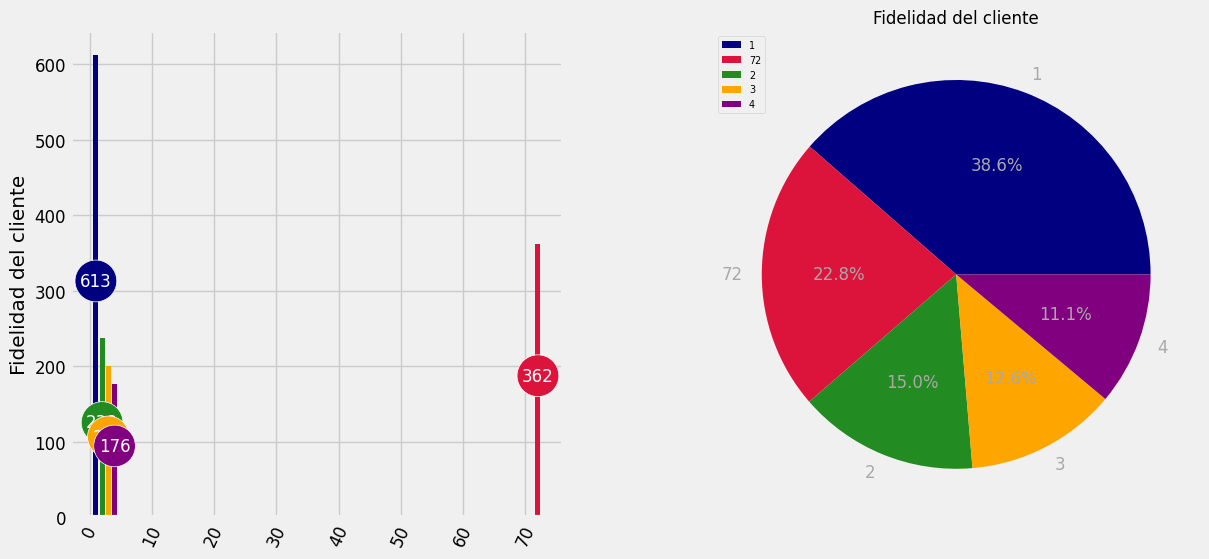

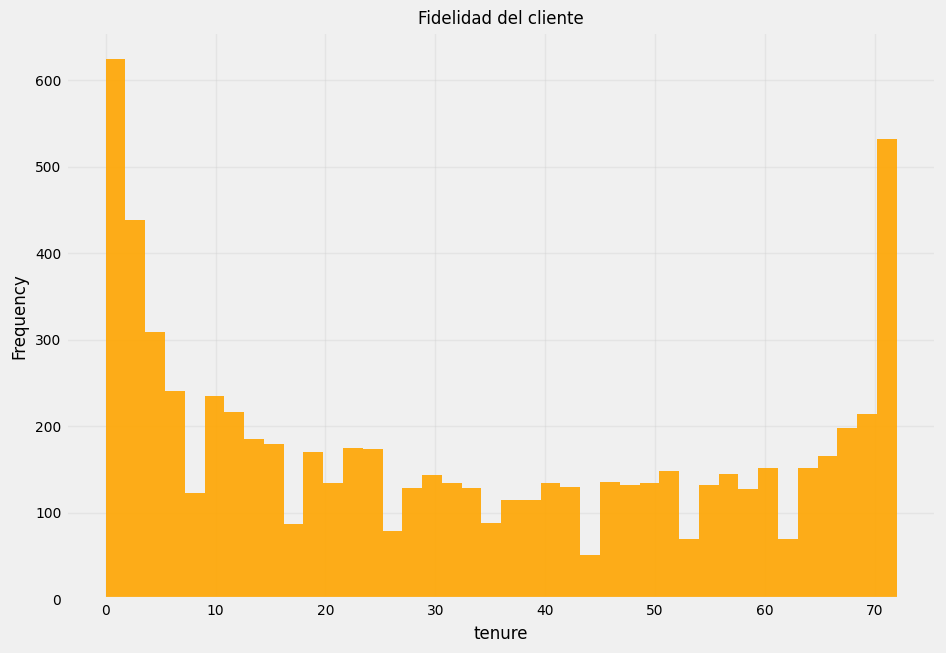

La distribución es platicúrtica con una curtosis de -1.39. Los datos se encuentran dispersos.
La distribución se encuentra sesgada hacia la izquierda 0.24.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
tenure,7043.0,32.371149,29.0,1,24.56,0.0,9.0,29.0,55.0,72.0,-1.39,0.24


In [21]:
categorical_analyzer = CategoricalAnalysis(df=df)
categorical_analyzer.plot_top_categories(title='Fidelidad del cliente', labely='Fidelidad del cliente', column_name='tenure')
categorical_analyzer.plot_distribution(title= 'Fidelidad del cliente', column_name='tenure', cant_bins = 40, color='orange', rotation=0, alpha=0.9)

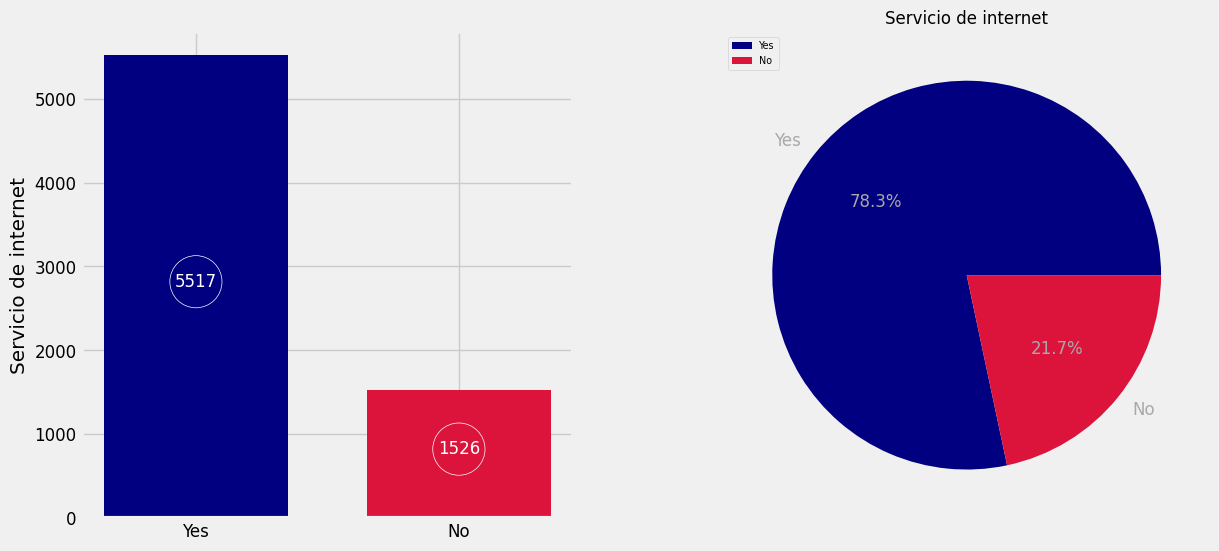

In [18]:
categorical_analyzer.plot_top_categories(title='Servicio de internet', labely='Servicio de internet', column_name='internet_service')

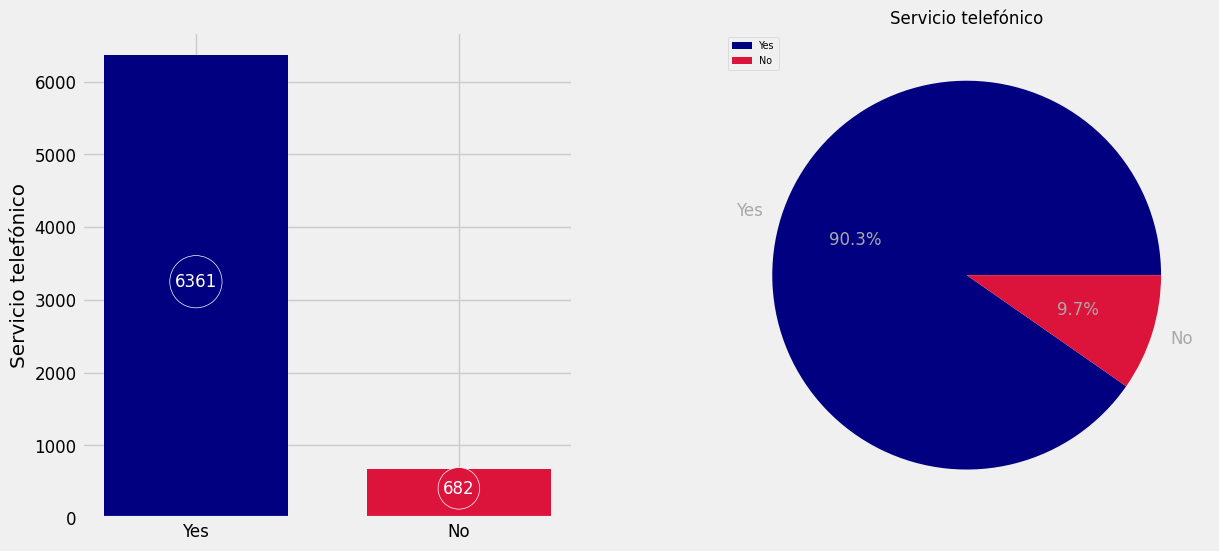

In [19]:
categorical_analyzer.plot_top_categories(title='Servicio telefónico', labely='Servicio telefónico', column_name='phone_service')

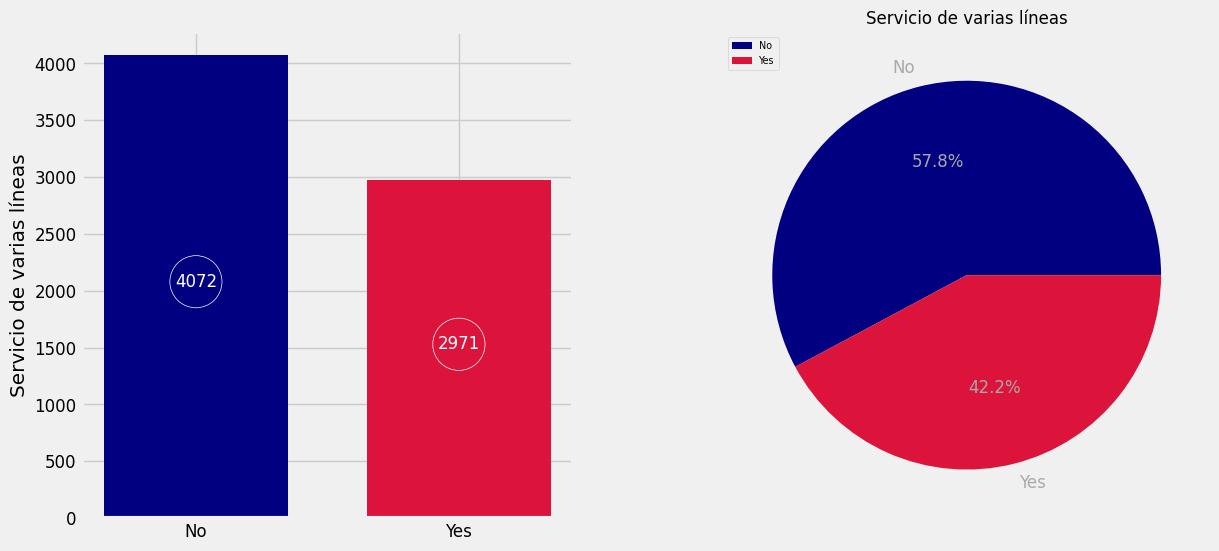

In [20]:
categorical_analyzer.plot_top_categories(title='Servicio de varias líneas', labely='Servicio de varias líneas', column_name='multiple_lines')

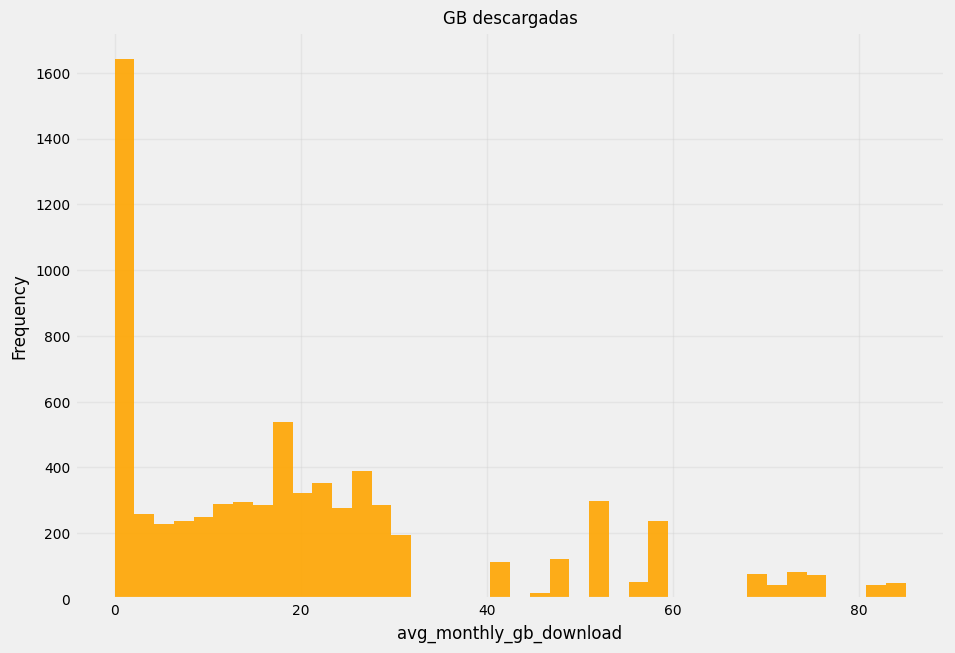

La distribución es leptocúrtica con una curtosis de 0.88. Los datos se encuentran concentrados alrededor de la media.
La distribución se encuentra sesgada hacia la izquierda 1.22.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
avg_monthly_gb_download,7043.0,20.515405,17.0,0,20.42,0.0,3.0,17.0,27.0,85.0,0.88,1.22


In [23]:
categorical_analyzer.plot_distribution(title= 'GB descargadas', column_name='avg_monthly_gb_download', cant_bins = 40, color='orange', rotation=0, alpha=0.9)

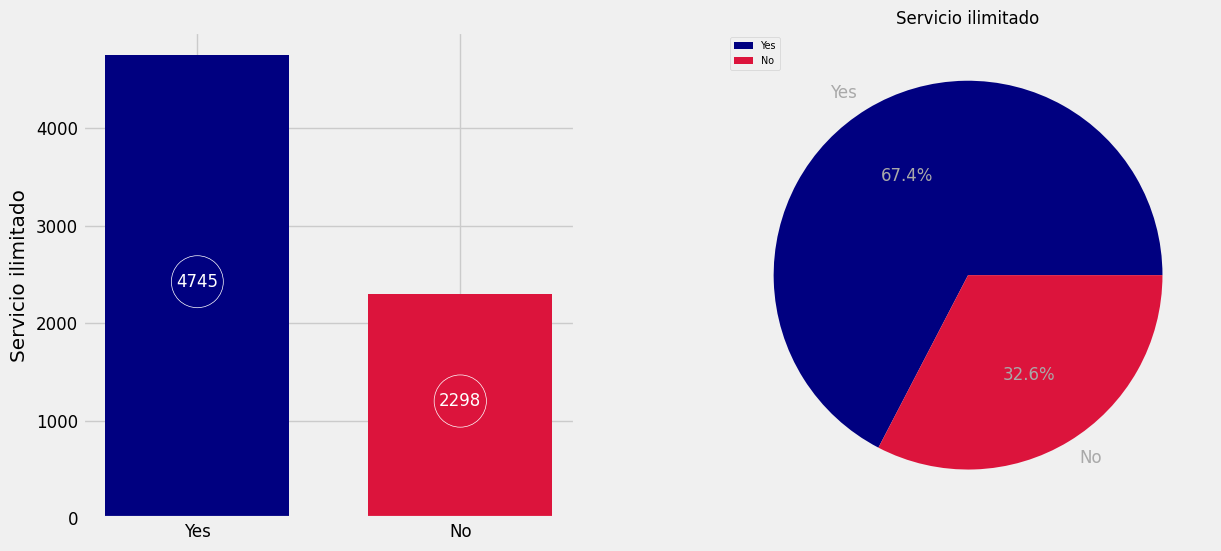

In [24]:
categorical_analyzer.plot_top_categories(title='Servicio ilimitado', labely='Servicio ilimitado', column_name='unlimited_data')

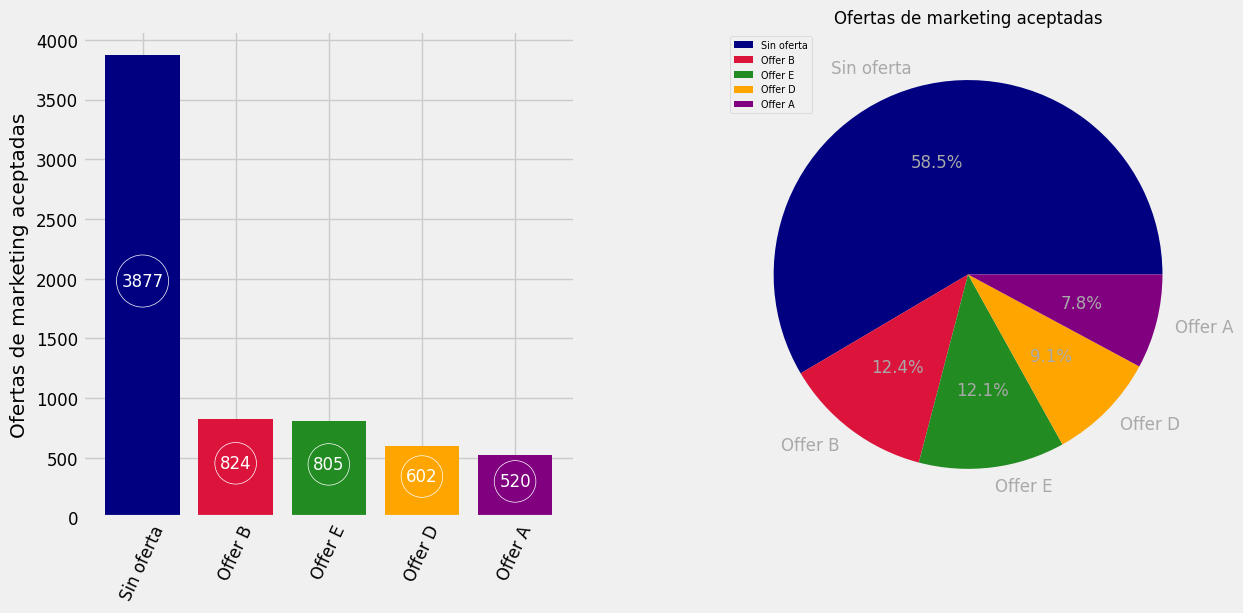

In [25]:
categorical_analyzer.plot_top_categories(title='Ofertas de marketing aceptadas', labely='Ofertas de marketing aceptadas', column_name='offer')

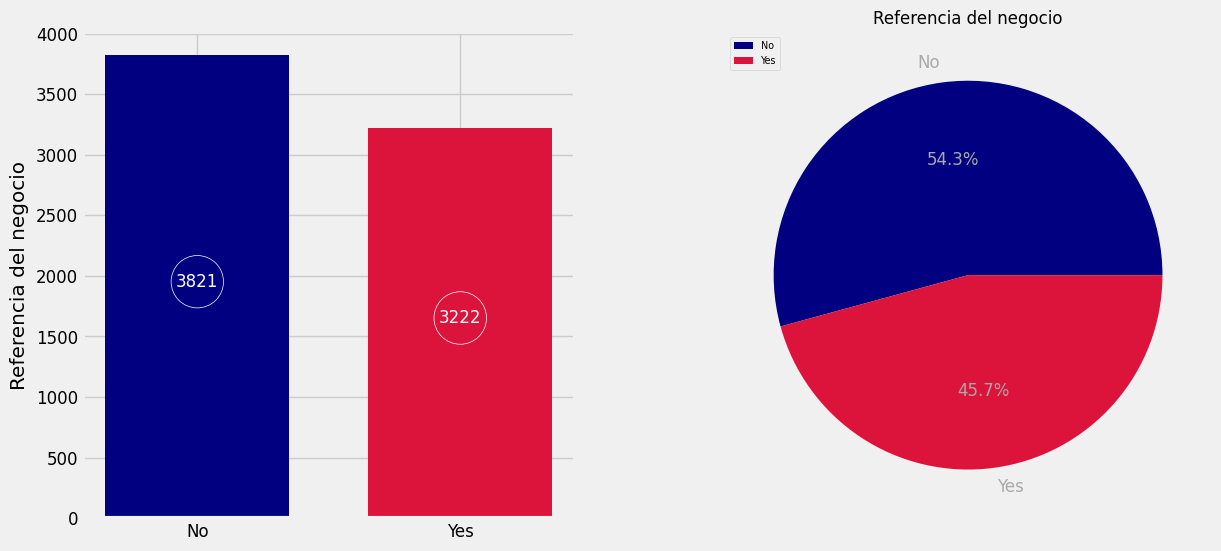

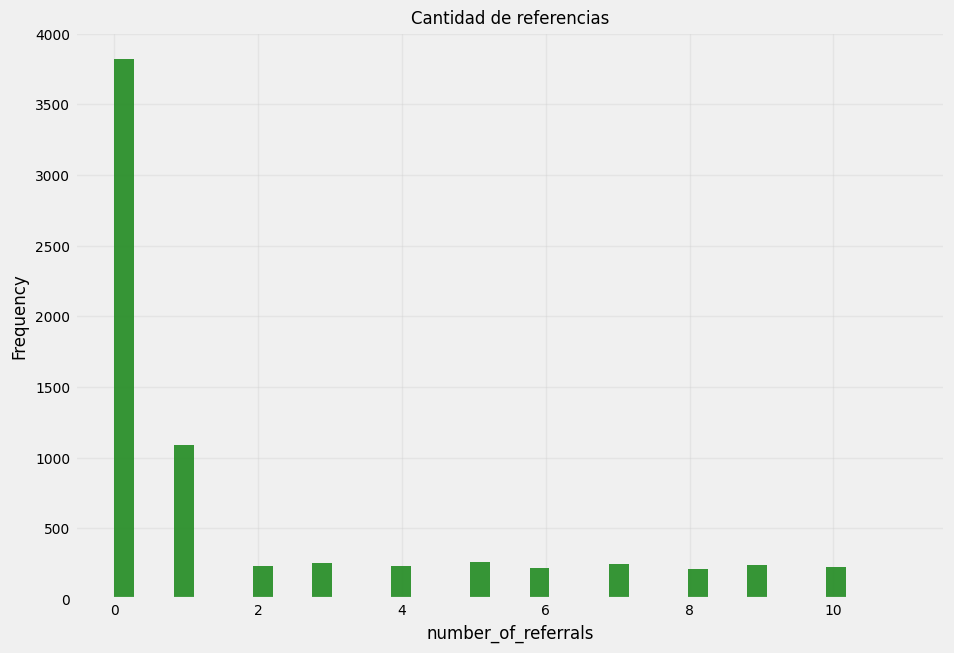

La distribución es leptocúrtica con una curtosis de 0.72. Los datos se encuentran concentrados alrededor de la media.
La distribución se encuentra sesgada hacia la izquierda 1.45.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
number_of_referrals,7043.0,1.951867,0.0,0,3.0,0.0,0.0,0.0,3.0,11.0,0.72,1.45


In [26]:
categorical_analyzer.plot_top_categories(title='Referencia del negocio', labely='Referencia del negocio', column_name='referred_a_friend')
categorical_analyzer.plot_distribution(title= 'Cantidad de referencias', column_name='number_of_referrals', cant_bins = 40, color='forestgreen', rotation=0, alpha=0.9)

In [27]:
# df[['online_security', 'online_backup', 'device_protection', 'premium_tech_support']] = df[['online_security', 'online_backup', 'device_protection', 'premium_tech_support']].apply(lambda x: x.map({'Yes': 2, 'No': 1}))
# sns.heatmap(df[['online_security', 'online_backup', 'device_protection', 'premium_tech_support']].corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
# plt.show()